### Step1: Data Sourcing

In [95]:
import warnings
warnings.filterwarnings('ignore')
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [96]:
train = pd.DataFrame(pd.read_csv("train.csv"))
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
train.shape

(1460, 81)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [99]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step2: Data Cleansing

#### MSSubClass

As per data dictionary, the column MSSubClass has categorical values with interger data type. Therefore, change the datatype to object

In [100]:
# Change the data type from Integer to object
train['MSSubClass']= train['MSSubClass'].astype('object')

#### Numerical columns with value 0

There are few numerical columns with value 0 which can be replaced with null value

In [101]:
#List of columns with value 0
zero_cols= train.columns[train.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [102]:
# Replace 0 with null value
train[zero_cols]= train[zero_cols].replace(0,np.NaN )

### Step3: Missing Value Treatment

In [103]:
#Percentage of missing values
round((train[train.columns[train.isnull().any()]].isnull().sum()/len(train))*100,2).sort_values(ascending=False)

PoolQC           99.52
PoolArea         99.52
3SsnPorch        98.36
LowQualFinSF     98.22
MiscVal          96.44
MiscFeature      96.30
BsmtHalfBath     94.38
Alley            93.77
ScreenPorch      92.05
BsmtFinSF2       88.56
EnclosedPorch    85.75
Fence            80.75
HalfBath         62.53
MasVnrArea       59.52
BsmtFullBath     58.63
2ndFlrSF         56.78
WoodDeckSF       52.12
Fireplaces       47.26
FireplaceQu      47.26
OpenPorchSF      44.93
BsmtFinSF1       31.99
LotFrontage      17.74
BsmtUnfSF         8.08
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        5.55
GarageArea        5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtCond          2.53
BsmtFinType1      2.53
BsmtQual          2.53
TotalBsmtSF       2.53
FullBath          0.62
MasVnrType        0.55
BedroomAbvGr      0.41
KitchenAbvGr      0.07
Electrical        0.07
dtype: float64

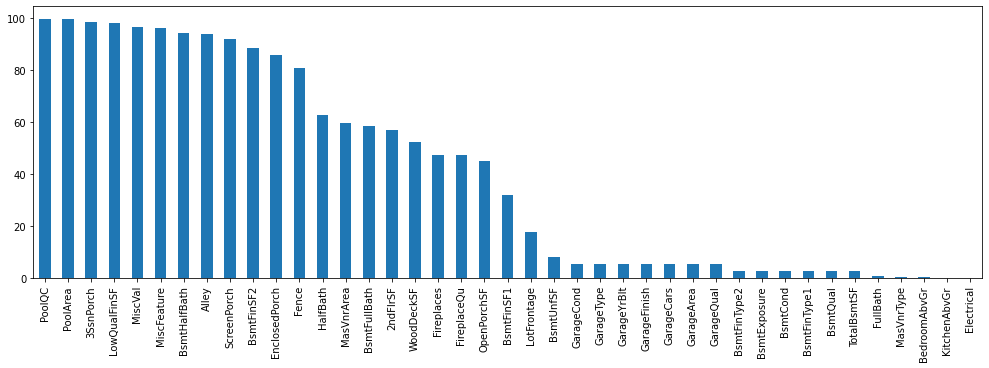

In [104]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((train[train.columns[train.isnull().any()]].isnull().sum()/len(train))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

#### Observations:

There are few columns with missing values more than 30%. Therefore, drop null values by columns.
LotFrontage null values can be imputed with median.
Garage columns has same percentage of missing values. Therefore, drop null values by rows.
Basement columns has same percentage of missing values. Therefore, drop null values by rows.
Masonry columns has same percentage of missing values. Therefore, drop null values by rows.

#### Drop columns having missing values >30%

In [105]:
# List of columns with missing values >30%
miss_cols= train.columns[(train.isnull().sum()/len(train)*100>30)]
miss_cols

Index(['Alley', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [106]:
#Drop columns with missing values >40%
train.drop(miss_cols,axis=1, inplace=True)
train.shape

(1460, 60)

#### LotFrontage

In [107]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

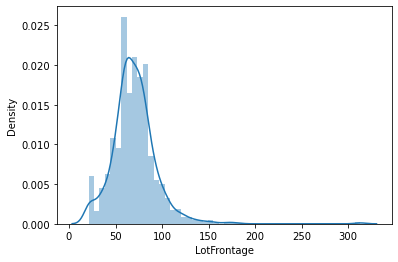

In [108]:
# Plot distribution
sns.distplot(train['LotFrontage'])
plt.show()

In [109]:
# Calculate LotFrontage missing values with median
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)

#### Garage Columns

In [110]:
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [111]:
train[train['GarageYrBlt'].isnull()][garage_cols]

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [112]:
# Drop null values by rows
train.dropna(subset=garage_cols, inplace=True)

In [113]:
train.shape

(1379, 60)

### Basement Columns

In [114]:
train.columns[train.isnull().any()]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'FullBath',
       'BedroomAbvGr'],
      dtype='object')

In [115]:
basement_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtUnfSF']
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF']

In [116]:
train.dropna(subset=basement_cols, inplace=True)

In [117]:
train.shape

(1274, 60)

### Other columns are calculated 

In [118]:
other_cols=train.columns[train.isnull().any()]
other_cols

Index(['MasVnrType', 'Electrical', 'FullBath', 'BedroomAbvGr'], dtype='object')

In [119]:
train.dropna(subset=other_cols, inplace=True)

In [120]:
train.shape

(1260, 60)

In [121]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [122]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual  

### Step3: Data Preparation
#### Categorical Variables
Drop Date, Year and Month columns as dataset may suffer high dimensionality problem if we create dummies of these columns

In [123]:
date_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [124]:
train.drop(date_cols,axis=1, inplace=True)
train.shape

(1260, 55)

### Create dummies for categorical variables

In [125]:
cat_cols=train.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [126]:
train_dum=pd.get_dummies(train[cat_cols],drop_first=True)

In [127]:
train_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [128]:
train_dum.shape

(1260, 204)

In [129]:
train=pd.concat([train,train_dum], axis=1)
train.shape

(1260, 259)

In [130]:
train.drop(cat_cols, axis=1, inplace=True)
train.shape

(1260, 220)

In [131]:
train.drop('Id', axis=1, inplace=True)
train.shape

(1260, 219)

Text(0.5, 1.0, 'Overall Condition')

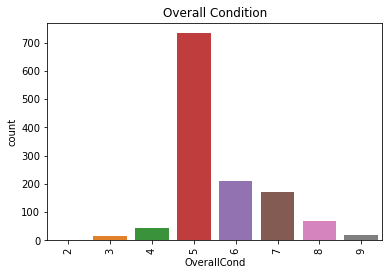

In [133]:
sns.countplot(x='OverallCond', data= train).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

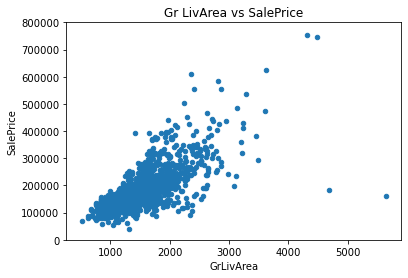

In [134]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

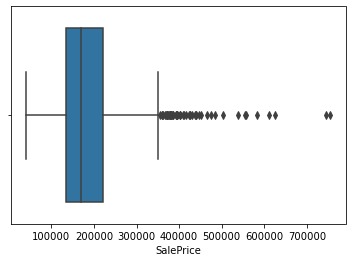

In [135]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=train)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

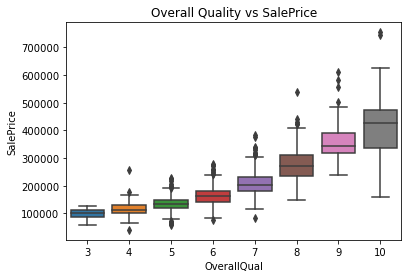

In [136]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title("Overall Quality vs SalePrice")

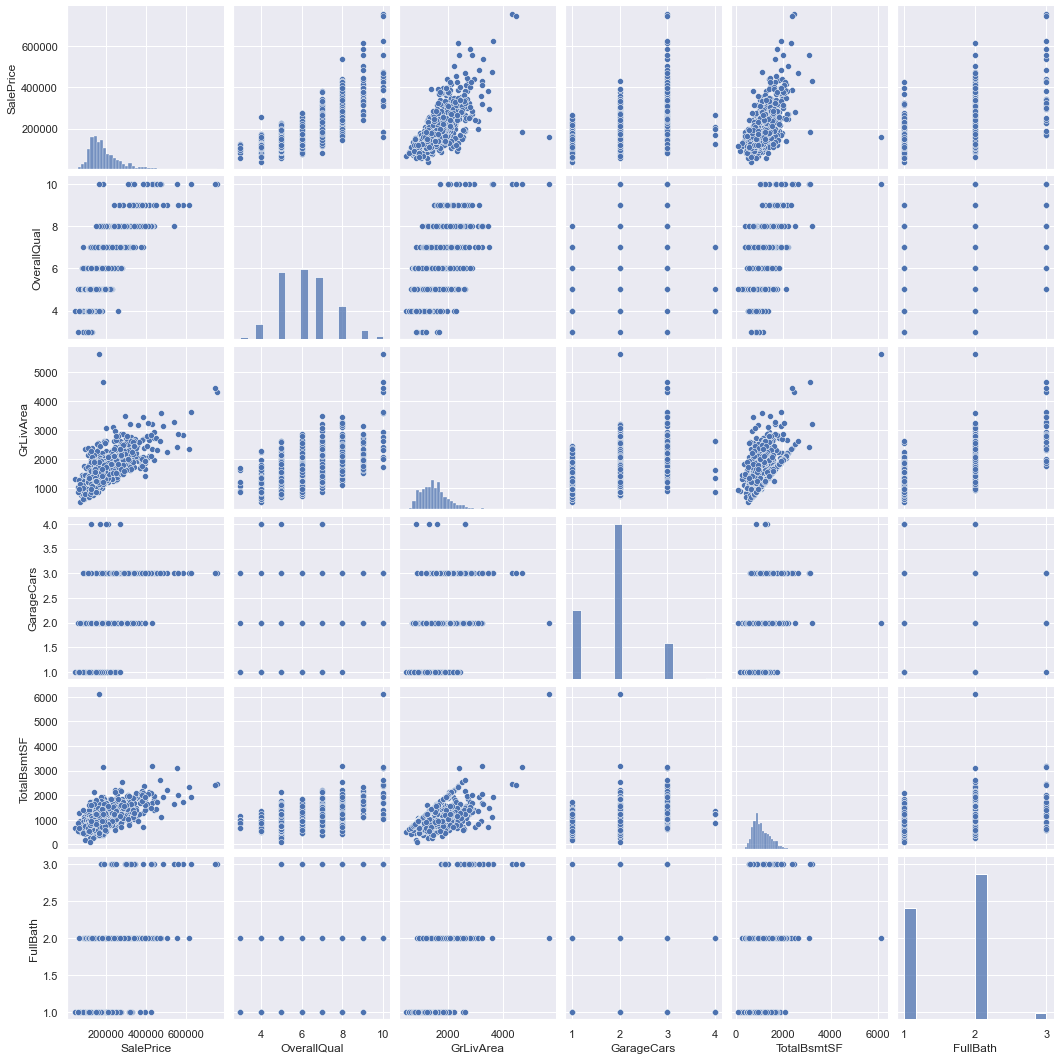

In [138]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(train[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

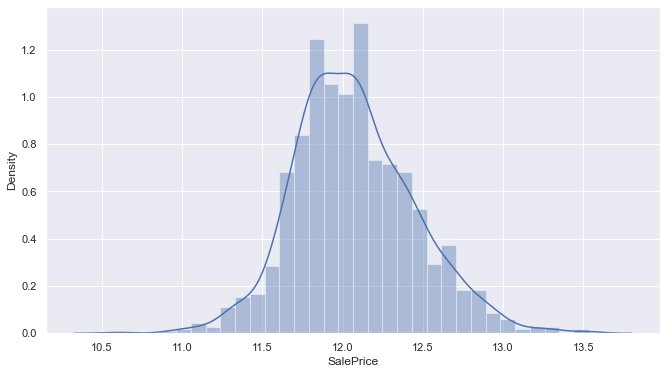

In [144]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(train["SalePrice"]))

### Split data frame into train and test sets

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
tr_train, train_test=train_test_split(train, train_size=0.7, test_size=0.3, random_state=100)

In [147]:
print('Train shape', tr_train.shape)
print('Test shape', train_test.shape)

Train shape (882, 219)
Test shape (378, 219)


### Rescaling Numerical Variables

In [148]:
num_cols=train.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler=MinMaxScaler()

In [151]:
tr_train[num_cols]=scaler.fit_transform(tr_train[num_cols])
train_test[num_cols]=scaler.transform(train_test[num_cols])

In [152]:
tr_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
113,0.164384,0.119639,0.428571,0.428571,0.383721,0.283764,0.421953,0.325020,0.5,0.4,...,0,0,0,0,0,0,0,0,0,0
1078,0.054795,0.018127,0.428571,0.428571,0.074074,0.123730,0.086719,0.043496,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1102,0.167808,0.033845,0.285714,0.714286,0.175711,0.150708,0.154669,0.100559,0.0,0.2,...,0,0,0,0,1,0,0,1,0,0
962,0.010274,0.005092,0.428571,0.571429,0.100775,0.116403,0.076265,0.183160,0.5,0.4,...,0,0,0,0,1,0,0,0,1,0
854,0.277397,0.100764,0.285714,0.285714,0.154177,0.276103,0.307912,0.229250,0.0,0.4,...,0,0,0,0,1,0,0,0,0,0


In [153]:
train_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1008,0.075342,0.065209,0.571429,0.428571,0.730405,0.267277,0.291518,0.215483,0.5,0.4,...,0,0,0,0,1,0,0,0,1,0
595,0.164384,0.060208,0.714286,0.428571,0.162791,0.284596,0.319078,0.238627,0.5,0.4,...,0,0,1,0,0,0,0,0,0,1
116,0.164384,0.062133,0.285714,0.428571,0.102498,0.164363,0.144690,0.092179,0.0,0.4,...,0,0,0,0,1,0,0,0,1,0
493,0.167808,0.039551,0.285714,0.571429,0.150301,0.193838,0.186743,0.127494,0.0,0.4,...,0,0,0,0,1,0,0,0,1,0
724,0.222603,0.072367,0.857143,0.428571,0.193798,0.265279,0.288667,0.213089,0.5,0.4,...,0,0,0,0,1,0,0,0,1,0


### Divide train set into X and Y sets

In [154]:
y_train=tr_train.pop('SalePrice')
x_train=tr_train

In [155]:
print('y_train shape', y_train.shape)
print('x_train shape', x_train.shape)

y_train shape (882,)
x_train shape (882, 218)


In [156]:
y_test=train_test.pop('SalePrice')
x_test=train_test

In [157]:
print('y_test shape', y_test.shape)
print('x_test shape', x_test.shape)

y_test shape (378,)
x_test shape (378, 218)


### Step4: Model Building
#### Model using Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [159]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [160]:
y_train_pred=lr.predict(x_train)

### Model Evaluation on train set

In [161]:
r2_score(y_train,y_train_pred)

0.9270773965438518

In [162]:
mean_squared_error(y_train,y_train_pred)

0.0009005862379975751

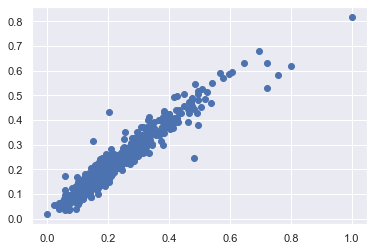

In [163]:
plt.scatter(y_train,y_train_pred)
plt.show()

### Model Evaluation on test set

In [164]:
y_test_pred=lr.predict(x_test)

In [165]:
r2_score(y_test,y_test_pred)

-3.271102847849815e+23

In [166]:
mean_squared_error(y_test,y_test_pred)

4.1000060841883693e+21

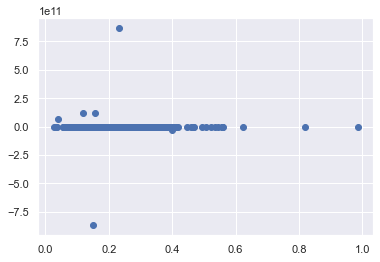

In [167]:
plt.scatter(y_test,y_test_pred)
plt.show()

### Model using Ridge Regression

In [168]:
from sklearn.linear_model import Ridge

In [169]:
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [170]:
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.928698351610256
0.001 ------ 0.9307217252608906
0.01 ------ 0.9300751731093305
0.1 ------ 0.9201549617049773
1 ------ 0.9021591929487158
10 ------ 0.8740462465264143
100 ------ 0.7651283009763985
1000 ------ 0.4987827194394485


In [171]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [172]:
y_train_pred=ridge.predict(x_train)

### Model Evaluation on train set

In [173]:
r2_score(y_train, y_train_pred)

0.9300751731093305

In [174]:
mean_squared_error(y_train, y_train_pred)

0.0008635640227788702

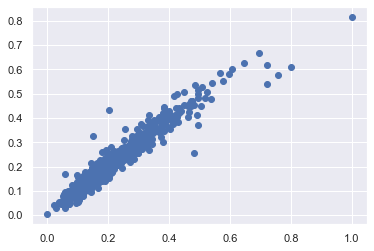

In [175]:
plt.scatter(y_train, y_train_pred)
plt.show()

### Model Evaluation on test set

In [176]:
y_test_pred=ridge.predict(x_test)

In [177]:
r2_score(y_test, y_test_pred)

0.8712416013889124

In [178]:
mean_squared_error(y_test, y_test_pred)

0.0016138600412482303

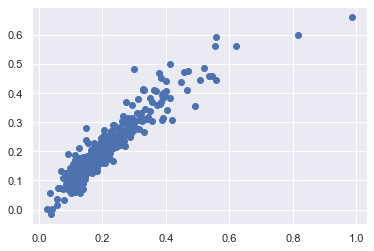

In [179]:
plt.scatter(y_test, y_test_pred)
plt.show()

### Model using Lasso Regression

In [180]:
from sklearn.linear_model import Lasso

In [181]:
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.93073020421136
0.001 ------ 0.8107202276877234
0.01 ------ 0.4107514239297255
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


In [182]:
lasso=Lasso(alpha=0)
lasso.fit(x_train, y_train)

Lasso(alpha=0)

In [183]:
y_train_pred=lasso.predict(x_train)

### Model Evaluation on train set

In [184]:
r2_score(y_train, y_train_pred)

0.93073020421136

In [185]:
mean_squared_error(y_test, y_test_pred)

0.0016138600412482303

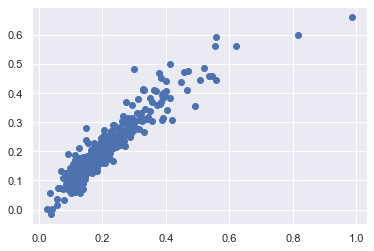

In [186]:
plt.scatter(y_test, y_test_pred)
plt.show()

### Model Evaluation on test set

In [187]:
y_test_pred=lasso.predict(x_test)

In [188]:
r2_score(y_test, y_test_pred)

0.874323140790082

In [189]:
mean_squared_error(y_test, y_test_pred)

0.0015752359719935238

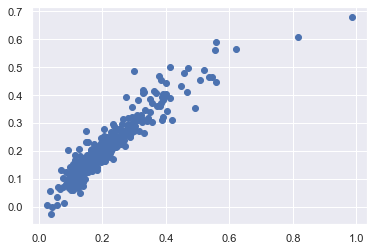

In [190]:
plt.scatter(y_test, y_test_pred)
plt.show()